<a href="https://colab.research.google.com/github/vit050587/Data-analysis/blob/master/analytics_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn import datasets
import random
from matplotlib.colors import ListedColormap

# Урок 1

## Задание 1

Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (eta) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [45]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [46]:
X.shape

(2, 10)

In [47]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
y

[45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [48]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

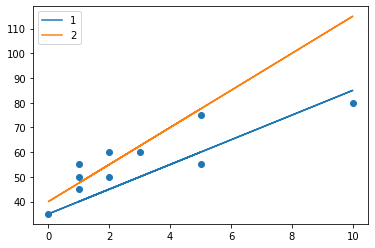

In [49]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [50]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [51]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [52]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [53]:
X.shape

(2, 10)

In [54]:
X.T.shape

(10, 2)

In [55]:
all(X @ y == np.dot(X,y))

True

In [56]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [57]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

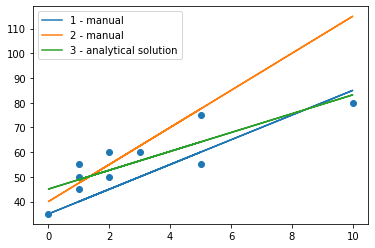

In [58]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [59]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [60]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [61]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [62]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

In [63]:
calc_mse(y, y_pred1), calc_mse(y, y_pred2), calc_mse(y, y_pred3)

(97.5, 188.75, 43.96875000000001)

Градиентный спуск

In [64]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [65]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [66]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

**ДЗ**

In [67]:
n = X.shape[1]
alpha = 1e-02
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [68]:
n = X.shape[1]
alpha = 0.04
iterations = 1000
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')
for i in range(iterations):
    y_pred = W @ X
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1 / n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 5.32 15.58], MSE = 3047.75
Iteration #100: W_new = [44.07620927  3.99134862], MSE = 44.46
Iteration #200: W_new = [45.0385066   3.81685083], MSE = 43.97
Iteration #300: W_new = [45.06191631  3.81260584], MSE = 43.97
Iteration #400: W_new = [45.0624858   3.81250257], MSE = 43.97
Iteration #500: W_new = [45.06249965  3.81250006], MSE = 43.97
Iteration #600: W_new = [45.06249999  3.8125    ], MSE = 43.97
Iteration #700: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #800: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #900: W_new = [45.0625  3.8125], MSE = 43.97


In [69]:
def grad_desc(X, y, alpha=1e-02, verbose=False, tol=0.0):
    n = X.shape[1]
    W = np.array([1, 0.5])                                                    # стартовые веса
    min_err = float('inf')                                                    # минимальная ошибка
    n_iter = 0                                                                # счетчик итераций
    stop_chek = True                                                          # остановка итераций
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:                                               # сравнение ошибки
            min_err = err
        else:                      
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [70]:
W_1, mse_1 = grad_desc(X, y, alpha=0.05, verbose=True)
W_1, mse_1

100 [44.66702658  3.88421301] 44.049619635762255
200 [45.05878313  3.813174  ] 43.968757143412105
300 [45.06246507  3.81250633] 43.96875000063098
Стоп! Количество итераций: 386, W: [45.06249934  3.81250012], MSE: 43.96875000000021


(array([45.06249937,  3.81250011]), 43.96875000000021)

**Попробовал визуализацию**

In [71]:
iterations = 300
alpha_list = []
mse_list = []

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]:
    alpha_list.append(alpha)
    errs = []
    W = np.array([1, 0.05])
    for t in range(iterations):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errs.append(err)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    mse_list.append(errs)

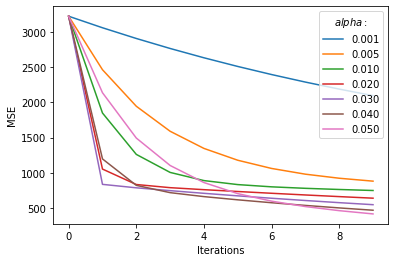

In [72]:
lim = 10
for i in range(len(alpha_list)):
    plt.plot(range(lim), mse_list[i][:lim], label = '{:.3f}'.format(alpha_list[i]))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(title=r'$alpha:$')

## Задание 2*

В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [73]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(iterations):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))        
    W_pred = W
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33


## Задание 3*

Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере diff=1e-6, а значение eta=1e-2?

In [74]:
diff = 1e-6
eta = 1e-2
W = np.array([1, 0.5])
err_pred = np.inf
i = 0
 
while True:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * np.dot(X, (y_pred - y)))
    i += 1
    if np.abs(err - err_pred) <= diff:
        print('Стоп!', i, W, err)
        break
err_pred = err

KeyboardInterrupt: ignored

# Урок 2

## Задание 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [75]:
X, y, W_default = make_regression(
    n_features=10,
    bias=3.5,
    noise=1.2,
    coef=True,
    random_state=42
)
W_default                                                       # Вектор весов данной модели

array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
       70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195])

In [76]:
y_pred_default = X @ W_default                                  # предсказания модели

In [77]:
def calc_mse(y, y_pred):                                        # MSE
    err = np.mean((y - y_pred) ** 2)
    return err

In [78]:
mse_default = calc_mse(y, y_pred_default)
mse_default

14.867688515340435

**GD**

In [79]:
def One_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )                                         # стартовые веса
    min_err = float('inf')                                                    # минимальная ошибка
    n_iter = 0                                                                # счетчик итераций
    stop_chek = True                                                          # остановка итераций
    errors = []
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)
        errors.append(err)
        if min_err - err > tol:                                               # сравнение ошибки
            min_err = err
        else:                      
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False        
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [80]:
W_1, mse_1, score_1 = One_grad_desc(X, y, alpha=0.001, tol=0.00001)

Стоп! Количество итераций: 6780, W: [17.01852674 54.4701608   4.75418366 63.30981993 93.39788232 71.04149497
 86.98574137 10.23640194  3.5111308  70.81231124], MSE: 14.301242158177217


**SGD**

In [81]:
def One_sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )                                         # стартовое значение весов
    n_batch = n // batch_size                                                 # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')                                                    # начальное значение ошибки модели - бесконечность
    n_iter = 0                                                                # счетчик итераций
    stop_chek = True                                                          # будем чекать снижение ошибки
    errors = []                                                               # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                                                   # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:                                       # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                                                 # остановка по достижении tol
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [82]:
W_2, mse_2, score_2 = One_sgd(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Стоп! Количество итераций: 5521, W: [17.03707088 54.52070753  4.68461143 63.30893092 93.32952887 71.12870142
 86.89221178 10.13239873  3.53977323 70.69321486], MSE: 10.99820761045047


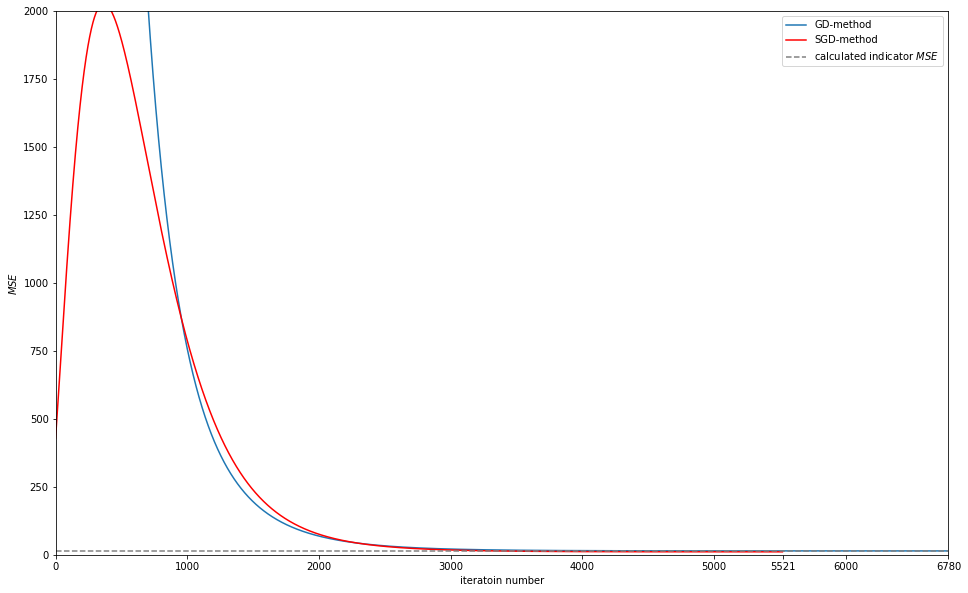

In [83]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_1)-1000))
plt.plot([x for x in range(len(score_1))], score_1, label='GD-method')
plt.plot([x for x in range(len(score_2))], score_2, c='r', label='SGD-method')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

**Вывод**: на основании графиков можно сделать вывод что примерно до 800-й итерации **SGD** 'расходился'(значение **MSE** росло), затем, до уроня 2300-2400 итераций оба алгоритма сходились, при этом скорость схождения **GD** была выше, чем у **SGD**. Однако затем скорости уравнялись, и **SGD** сошелся раньше чем **GD**

## Задание 2

Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.
* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

# Урок 3

## Задание 1

 Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [84]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.T, y)
model.predict(X.T)

array([0.2617132 , 0.17509907, 1.02794228, 0.21840613, 0.53795688,
       0.31862798, 1.20396413, 0.05324898, 0.28336673, 0.91967463])

In [86]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [87]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [88]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [89]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [90]:
y_pred=sigmoid(model.predict(X.T))
y_pred

array([0.56505739, 0.54366327, 0.73651677, 0.55438552, 0.63133701,
       0.57898984, 0.76922923, 0.5133091 , 0.57037143, 0.7149758 ])

In [91]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

**Модифицируем функцию:**

In [93]:
def calc_logloss_mod(y, y_pred):
    y_pred_res=np.where(y_pred==1, y_pred-1e-07, np.where(y_pred==0, y_pred+1e-07, y_pred))
    err = - np.mean(y * np.log(y_pred_res) + (1.0 - y) * np.log(1.0 - y_pred_res))
    return err

Для проверки изменим вектор предсказанных значений, добавив в него нули и единицы

In [94]:
y_pred1=np.array([0.56505739, 0., 0.73651677, 0.55438552, 1.,
       0.57898984, 0.76922923, 0.5133091 , 0., 0.7149758 ])
calc_logloss_mod(y, y_pred1)

2.024785862818215

Исходная функция при этом возвращает nan

In [95]:
calc_logloss(y, y_pred1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


nan

## Задание 2

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [96]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_mod(y, y_pred)                                     # заменим на модифицированную нами функцию
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

In [97]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-5)

1000 [ 0.49282757 -0.15007512  0.64748969  1.51727928] 1.2013133809011647


для подбора параметров модифицируем функцию, для остановки до достижения заданного количества итераций, если величина ошибки не изменяется выше указанного показателя

In [98]:
def eval_model(X, y, verbose=False, alpha=1e-4, tol=0.00001): 
    view_ind = 10**(-np.log10(tol)-2) if -np.log10(tol)-2>=1 else 1           # задаём параметр кратности вывода промежуточных результатов
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    min_err = float('inf')                                                    # начальное значение ошибки модели - бесконечность
    n_iter = 0                                                                # отслеживаем количество итераций
    stop_chek = True
    errors = []                                                               # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_mod(y, y_pred)                                     # заменим на модифицированную нами функцию
        errors.append(err)
        if min_err - err > tol:                                               # контролируем текущее значение ошибки
            min_err = err
        else:                                                                 # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, logloss: {min_err}')
            stop_chek = False
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if verbose:
            if n_iter % view_ind == 0:
                print(n_iter, W, err)
    return W, min_err, n_iter

In [99]:
W = eval_model(X_st, y, alpha=0.6, tol=0.00001, verbose=True)

1000 [-8.650831   -1.25372329 -1.54901597  7.41955336] 0.2823965843259973
2000 [-12.40065236  -1.54519184  -2.73360596  10.40076601] 0.24130322780777833
3000 [-15.36100912  -1.79394114  -3.63840883  12.7942367 ] 0.21560879813812384
4000 [-17.89496779  -2.01191968  -4.40078502  14.84932619] 0.1967862662226779
5000 [-20.12312962  -2.20577442  -5.0641727   16.65729995] 0.18224763493044263
6000 [-22.11355698  -2.38010899  -5.65216163  18.27197463] 0.17065959157189317
Stop descent! iteration: 6204, weights: [-22.49301224  -2.41343975  -5.76381384  18.57970581], logloss: 0.16858809293234242


Подберем лучшие параметры $\alpha$ для модели(поскольку функция сама отслеживает оптимальное количество итераций, то других параметров подбирать не нужно):

In [100]:
def get_best_params(X,y,args):
    best_params=[]
    for arg in args:
        W,err,n_iter = eval_model(X, y, alpha=arg)
        best_params.append((arg,err,n_iter))
    best_params.sort(key=lambda x:x[1])
    print(f'best - alpha: {best_params[0][0]},\nresults:\nerr: {best_params[0][1]},\nn_iter: {best_params[0][2]}')
    return best_params[0]

In [101]:
alphas=[1, 0.5,0.1,0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001, 0.000005, 0.000001, 0.0000005, 0.0000001]
bp=get_best_params(X_st,y,alphas)
bp

Stop descent! iteration: 4, weights: [-0.01512682 -1.44851808  0.75644797  1.06048112], logloss: 0.9360085439942413
Stop descent! iteration: 6391, weights: [-20.79292735  -2.26433611  -5.26248927  17.20072759], logloss: 0.17820649249087692
Stop descent! iteration: 5853, weights: [-8.53503588 -1.24557698 -1.51126618  7.32961021], logloss: 0.28385397215014785
Stop descent! iteration: 6493, weights: [-6.18756485 -1.10137381 -0.7192765   5.56154533], logloss: 0.3198397227902269
Stop descent! iteration: 6823, weights: [-2.01966427 -0.97319445  0.84001927  2.78391711], logloss: 0.43337113257078075
Stop descent! iteration: 4134, weights: [-0.6636217  -0.82018794  1.11647506  1.7462896 ], logloss: 0.4980620278791868
Stop descent! iteration: 3017, weights: [ 0.06153887 -0.68603638  0.85254687  1.2130508 ], logloss: 0.555828709755477
Stop descent! iteration: 3104, weights: [ 0.19306961 -0.69531514  0.74058514  1.21943805], logloss: 0.5765738129341405
Stop descent! iteration: 6890, weights: [ 0.3

(0.5, 0.17820649249087692, 6391)

Лучший результат получаем при $\alpha  = 0.5$

Попробуем подобрать $\alpha$ из интервала $(1,0.1)$

In [102]:
alphas=np.arange(1,10)/10
bp=get_best_params(X_st,y,alphas)
bp

Stop descent! iteration: 5853, weights: [-8.53503588 -1.24557698 -1.51126618  7.32961021], logloss: 0.28385397215014785
Stop descent! iteration: 6187, weights: [-12.59825223  -1.5614873   -2.79460722  10.55999424], logloss: 0.23942165779557908
Stop descent! iteration: 6534, weights: [-16.06978213  -1.85457135  -3.85261322  13.36879382], logloss: 0.21006752362747183
Stop descent! iteration: 6535, weights: [-18.71799582  -2.08333293  -4.64651497  15.51714508], logloss: 0.19120600628315837
Stop descent! iteration: 6391, weights: [-20.79292735  -2.26433611  -5.26248927  17.20072759], logloss: 0.17820649249087692
Stop descent! iteration: 6204, weights: [-22.49301224  -2.41343975  -5.76381384  18.57970581], logloss: 0.16858809293234242
Stop descent! iteration: 6, weights: [ 9.91945996e-04 -8.78773470e-01  8.74063808e-01  1.19348750e+00], logloss: 0.5868163760298954
Stop descent! iteration: 4, weights: [ 0.06140228 -1.1126246   0.76192585  1.11769668], logloss: 0.6865501501467717
Stop descent

(0.6, 0.16858809293234242, 6204)

Лучший параметр скорости обучения для нашего примера $\alpha  = 0.6$

## Задание 3

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

In [103]:
def calc_pred_proba(w, x): 
    pred_proba = sigmoid(np.dot(w, x))
    return pred_proba

In [104]:
W,_err,_it = eval_model(X_st, y, alpha=0.6, verbose=True)

1000 [-8.650831   -1.25372329 -1.54901597  7.41955336] 0.2823965843259973
2000 [-12.40065236  -1.54519184  -2.73360596  10.40076601] 0.24130322780777833
3000 [-15.36100912  -1.79394114  -3.63840883  12.7942367 ] 0.21560879813812384
4000 [-17.89496779  -2.01191968  -4.40078502  14.84932619] 0.1967862662226779
5000 [-20.12312962  -2.20577442  -5.0641727   16.65729995] 0.18224763493044263
6000 [-22.11355698  -2.38010899  -5.65216163  18.27197463] 0.17065959157189317
Stop descent! iteration: 6204, weights: [-22.49301224  -2.41343975  -5.76381384  18.57970581], logloss: 0.16858809293234242


In [105]:
y_pred_prob = calc_pred_proba(W, X_st)
y_pred_prob

array([0.33613789, 0.04486849, 0.99999633, 0.13361891, 0.85570148,
       0.13784668, 0.99999968, 0.04426597, 0.47847259, 0.99992831])

## Задание 4

Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

In [106]:
def calc_pred(w,x, prob_lim=0.5):                                             # установим порог вероятности, при превышении которого, объект будет относиться к классу 1
    pred_proba = sigmoid(np.dot(w, x))
    pred=np.zeros_like(pred_proba)
    for idx, prob in enumerate(pred_proba):
        if prob>prob_lim:
            pred[idx]=1
    return pred

In [107]:
y_pred=calc_pred(W, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

## Задание 5

Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

$$accuracy = \frac{TP +TN}{TP+FP+TN+FN} $$

In [109]:
def my_accuracy(real, pred):
    all_res=len(real)
    trues=0
    for i in range(all_res):
        trues+=int(real[i]==pred[i])
    return trues/all_res

In [110]:
my_accuracy(y,y_pred)

0.9

Проверка:

$$\frac{TP|FP}{FN|TN} $$

In [111]:
def my_confusion_matrix(real, pred):
    n_classes=len(np.unique(real))
    all_res=len(real)
    conf_matr=np.zeros((n_classes,n_classes), dtype='int')
    for i in range(all_res):
        conf_matr[int(real[i])][int(pred[i])] += 1
    return conf_matr  

In [112]:
my_confusion_matrix(y,y_pred)

array([[5, 0],
       [1, 4]])

In [114]:
confusion_matrix(y,y_pred)

array([[5, 0],
       [1, 4]])

$$precision = \frac{TP}{TP+FP} $$

In [115]:
def my_precision(real, pred):
    tn, fp, fn, tp = my_confusion_matrix(real, pred).ravel()
    return tp/(tp+fp)
    

In [116]:
my_precision(y,y_pred)

1.0

In [117]:
precision_score(y,y_pred)

1.0

$$recall = \frac{TP}{TP+FN} $$

In [118]:
def my_recall(real, pred):
    tn, fp, fn, tp = my_confusion_matrix(real, pred).ravel()
    return tp/(tp+fn)

In [119]:
my_recall(y,y_pred)

0.8

In [120]:
recall_score(y,y_pred)

0.8

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

In [121]:
def my_f1(real, pred, beta=1):
    return (1+beta**2)*my_precision(real, pred)*my_recall(y,y_pred)/(beta**2*my_precision(real, pred)+my_recall(y,y_pred))

In [122]:
my_f1(y,y_pred)

0.888888888888889

In [123]:
f1_score(y,y_pred)

0.888888888888889

## Задание 6

Могла ли модель переобучиться? Почему?

Модель логистической регрессии склонна к переобучению, в следствии того что мы используем сигмоиду для того, чтобы преобразовать в вероятность предсказания линейной модели. А т.к. сигмоида не имеет максимума и минимума, а только асимптоты в $0$ и $1$, градиентный спуск не может достичь оптимального решения с помощью градиентных шагов доводя веса до все более экстремальных значений, пытаясь достичь нулевых потерь. При большой размерности данных вероятность этого еще больше увеличивается. Поэтому в качестве способа регуляризации можно использовать раннюю остановку работы модели, а так же $L1$ и $L2$ регуляризацию.

# Урок 4

## Задание 1

In [126]:
# сгенерируем данные
classification_data, classification_labels = datasets.make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2, 
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.75,
    random_state=5
)

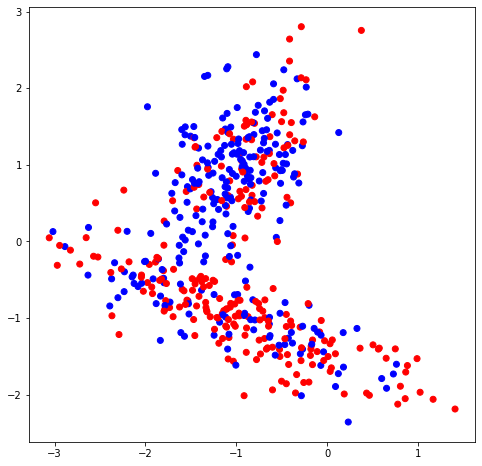

In [129]:
# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)

In [131]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index                                                    # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t                                                            # значение порога
        self.true_branch = true_branch                                        # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch                                      # поддерево, не удовлетворяющее условию в узле

In [132]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction       

In [133]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [134]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [135]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [136]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5
    
    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [137]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [138]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [139]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [140]:
# Напечатаем ход нашего дерева
def print_tree(node, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index))
    print(spacing + 'Порог', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")
    

In [141]:
# Введем функцию подсчета точности как доли правильных ответов
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [142]:
# Визуализируем дерево на графике

def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

В коде из методички реализуйте один или несколько критериев останова: минимальное количество объектов в листе (min_leaf), максимальная глубина дерева, максимальное количество листьев и т.д. Добавьте эти критерии в параметры функции build_tree и проверьте ее работоспособность с помощью визуализации дерева (функция print_tree).

введем критерий остановки по достижении заданной глубины дерева, с регулируемым количеством элементов в листе:

In [143]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels, min_leaf):
    
    #  обозначим минимальное количество объектов в узле(если не задано, то приравниваем к 1)
    min_leaf = min_leaf if min_leaf else 1
    
    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [144]:
# Построение дерева с помощью рекурсивной функции, добавлено ограничение глубины, и минимальное количество элементов в листе:

def build_tree(data, labels, max_depth=None, min_leaf=None):
    
    # Если глубина не задана, будем строить по максимуму
    max_depth=max_depth if max_depth!=None else data.shape[0]*data.shape[1]

    quality, t, index = find_best_split(data, labels, min_leaf)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества, или достигли максимальной глубины
    if quality == 0 or max_depth==0 :
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева, уменьшая их глубину
    true_branch = build_tree(true_data, true_labels,max_depth=max_depth-1,min_leaf=min_leaf)
    false_branch = build_tree(false_data, false_labels,max_depth=max_depth-1, min_leaf=min_leaf)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [145]:
# Разобьем выборку на обучающую и тестовую

from sklearn import model_selection

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_data, classification_labels, test_size = 0.3, random_state = 1
)

In [146]:
# Построим дерево по обучающей выборке
my_tree = build_tree(train_data, train_labels, max_depth=6, min_leaf=15)

In [147]:
print_tree(my_tree)

Индекс 1
Порог -0.46624201061399206
--> True:
  Индекс 0
  Порог -1.7945477571816848
  --> True:
    Прогноз: 1
  --> False:
    Индекс 0
    Порог -1.1834902220493384
    --> True:
      Прогноз: 0
    --> False:
      Индекс 1
      Порог -1.2659561512192585
      --> True:
        Индекс 0
        Порог 0.04595444880264021
        --> True:
          Индекс 1
          Порог -1.4684500103378144
          --> True:
            Прогноз: 0
          --> False:
            Прогноз: 0
        --> False:
          Прогноз: 0
      --> False:
        Индекс 0
        Порог -0.645018457805447
        --> True:
          Индекс 1
          Порог -0.9370288134393376
          --> True:
            Прогноз: 0
          --> False:
            Прогноз: 0
        --> False:
          Прогноз: 1
--> False:
  Индекс 0
  Порог -0.9820958539320116
  --> True:
    Индекс 0
    Порог -1.6445609784573159
    --> True:
      Индекс 0
      Порог -2.1808550952749775
      --> True:
        Прогноз: 0
    

In [148]:
# Получим ответы для обучающей выборки 
train_answers = predict(train_data, my_tree)

In [149]:
# И получим ответы для тестовой выборки
answers = predict(test_data, my_tree)

In [150]:
train_accuracy = accuracy_metric(train_labels, train_answers)
train_accuracy

72.57142857142857

In [152]:
# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, answers)
test_accuracy

60.66666666666667

Text(0.5, 1.0, 'Test accuracy=60.67')

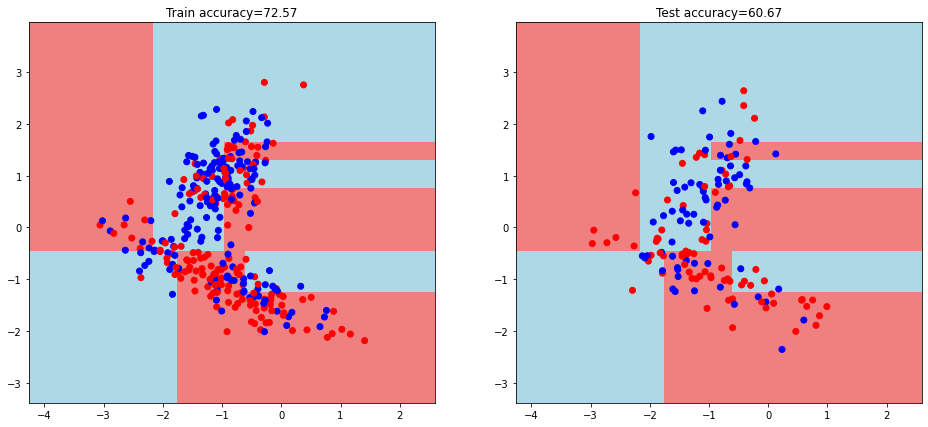

In [153]:
plt.figure(figsize = (16, 7))

# график обучающей выборки
plt.subplot(1,2,1)
xx, yy = get_meshgrid(train_data)
mesh_predictions = np.array(predict(np.c_[xx.ravel(), yy.ravel()], my_tree)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={train_accuracy:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={test_accuracy:.2f}')

## Задание 2*

Для задачи классификации обучите дерево решений с использованием критериев разбиения Джини и Энтропия. Сравните качество классификации, сделайте выводы.

In [154]:
# Расчет критерия энтропии

def entropy(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 0
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p*np.log2(p) if p!=0 else 0
    
        
    return impurity

In [155]:
# Расчет качества  в зависимости от переданного критерия

def quality(left_labels, right_labels, current_criterion, criterion):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    if criterion=='entropy':
        qual=current_criterion - p * entropy(left_labels) - (1 - p) * entropy(right_labels)
    else:
        qual=current_criterion - p * gini(left_labels) - (1 - p) * gini(right_labels)  
    
    return qual

In [156]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels, min_leaf, criterion):
    
    #  обозначим минимальное количество объектов в узле(если не задано, то приравниваем к 1)
    min_leaf = min_leaf if min_leaf else 1
    # проверяем критерий оценки
    current_criterion = entropy(labels) if criterion=='entropy' else gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_criterion, criterion)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index
    return best_quality, best_t, best_index

In [157]:
# Построение дерева с помощью рекурсивной функции, добавлено ограничение глубины, и минимальное количество элементов в листе
# А также выбираем критерий оценки (по умолчанию 'Gini')

def build_tree(data, labels, max_depth=None, min_leaf=None,criterion='Gini'):
    
    # Если глубина не задана, будем строить по максимуму
    max_depth=max_depth if max_depth!=None else data.shape[0]*data.shape[1]

    quality, t, index = find_best_split(data, labels, min_leaf, criterion)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества, или достигли максимальной глубины
    if quality == 0 or max_depth==0 :
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева, уменьшая их глубину
    true_branch = build_tree(true_data, true_labels,max_depth=max_depth-1,min_leaf=min_leaf, criterion=criterion)
    false_branch = build_tree(false_data, false_labels,max_depth=max_depth-1, min_leaf=min_leaf, criterion=criterion)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [158]:
my_tree = build_tree(train_data, train_labels, max_depth=4, min_leaf=15)

In [159]:
my_tree1 = build_tree(train_data, train_labels, max_depth=4, min_leaf=15, criterion='entropy')

In [160]:
# Получим ответы для обучающей выборки 
train_answers = predict(train_data, my_tree)

In [161]:
# И получим ответы для тестовой выборки
answers = predict(test_data, my_tree)

In [162]:
train_accuracy = accuracy_metric(train_labels, train_answers)
train_accuracy

69.71428571428572

In [163]:
# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, answers)
test_accuracy

63.33333333333333

In [164]:
train_answers1 = predict(train_data, my_tree1)
answers1 = predict(test_data, my_tree1)

In [165]:
train_accuracy1 = accuracy_metric(train_labels, train_answers1)
train_accuracy1

69.71428571428572

In [166]:
test_accuracy1 = accuracy_metric(test_labels, answers1)
test_accuracy1

63.33333333333333

**Вывод:** качество классификации не изменилось, поскольку оба критерия достигают своих максимальных значений, когда все объекты относятся к одному класссу, а максимум - при равномерном распределении.

## Задание 3*

Реализуйте дерево для задачи регрессии. Возьмите за основу дерево, реализованное в методичке, заменив механизм предсказания в листе на взятие среднего значения по выборке, а критерий Джини на дисперсию значений. Проверьте точность предсказания дерева на одной из метрик задачи регрессии.

In [ ]:
# 3 задание
from sklearn import datasets

regression_data, regression_labels = datasets.make_regression(n_samples=100, 
                                                      n_features=1, noise=10,
                                                      random_state=42)
plt.figure(figsize=(6,6))
plt.scatter(regression_data, regression_labels, c='darkorange', edgecolor='black', s=70);